# Pandas

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

## Series in Pandas

In [4]:
pd.Series([2, 6, 10])

0     2
1     6
2    10
dtype: int64

In [6]:
p1 = pd.Series([3, 5, 9], index=['a', 'b', 'c'])

In [8]:
p1[['a', 'c']]

a    3
c    9
dtype: int64

In [9]:
pd.Series({'a1': 5, 'a2': 6})

a1    5
a2    6
dtype: int64

In [10]:
pd.Series({'a1': 'Hello', 'a2': 5, 'a3': True})

a1    Hello
a2        5
a3     True
dtype: object

In [13]:
p4 = pd.Series([1,2,3], index=['a', 'b', 'c'])
p5 = pd.Series([4,5,6], index=['b', 'c', 'd'])

In [15]:
p4 * p5 # multiply elements with the same index

a     NaN
b     8.0
c    15.0
d     NaN
dtype: float64

## DataFrame

In [20]:
df = pd.DataFrame(data=[[2, 4, 6, -1],[3, -4, 2, -1],[-10, 3, 5, -7]], columns=['c1', 'c2', 'c3', 'c4'], index=['r1', 'r2', 'r3'])

In [21]:
df

,c1,c2,c3,c4
r1,2,4,6,-1
r2,3,-4,2,-1
r3,-10,3,5,-7


In [23]:
df.head(1)

,c1,c2,c3,c4
r1,2,4,6,-1


In [36]:
df['newC'] = df['c1'] + 1 # creates a new column and assigns the values from c1 + 1 to each of its elements

In [30]:
df

,c1,c2,c3,c4,newC
r1,2,4,6,-1,3
r2,3,-4,2,-1,4
r3,-10,3,5,-7,-9


In [37]:
df.drop('newC', axis=1, inplace=True) # axis 1 references columns and 0 references row and inplace makes it applies the changes to current serie

In [39]:
df

,c1,c2,c3,c4
r1,2,4,6,-1
r2,3,-4,2,-1
r3,-10,3,5,-7


## Selection

In [40]:
df

,c1,c2,c3,c4
r1,2,4,6,-1
r2,3,-4,2,-1
r3,-10,3,5,-7


In [41]:
df['c2']

r1    4
r2   -4
r3    3
Name: c2, dtype: int64

In [44]:
df[['c2', 'c4']]

,c2,c4
r1,4,-1
r2,-4,-1
r3,3,-7


In [52]:
df.loc['r1', 'c2':'c3']

c2    4
c3    6
Name: r1, dtype: int64

In [59]:
df.loc['r1', ['c2', 'c3']]

c2    4
c3    6
Name: r1, dtype: int64

In [60]:
df.iloc[0, 1:3]

c2    4
c3    6
Name: r1, dtype: int64

In [61]:
df.iloc[0, [1, 2]]

c2    4
c3    6
Name: r1, dtype: int64

## Index, Multiindex

In [62]:
df.index

Index(['r1', 'r2', 'r3'], dtype='object')

In [63]:
df.reset_index()

,index,c1,c2,c3,c4
0,r1,2,4,6,-1
1,r2,3,-4,2,-1
2,r3,-10,3,5,-7


In [64]:
df.set_index('c3')

,c1,c2,c4
c3,,,
6,2,4,-1
2,3,-4,-1
5,-10,3,-7


In [65]:
df

,c1,c2,c3,c4
r1,2,4,6,-1
r2,3,-4,2,-1
r3,-10,3,5,-7


In [67]:
df.loc['r2', :]

c1    3
c2   -4
c3    2
c4   -1
Name: r2, dtype: int64

## Multiindex

In [94]:
scores = pd.DataFrame(
    np.array([['Math', 'C1', 's1', 93],
          ['Science', 'C1', 's2', 78],
          ['English', 'C1', 's3', 86],
          ['Math', 'C2', 's4', 58],
          ['English', 'C2', 's5', 71],
          ['Science', 'C2', 's6', 69]]), columns=['Subject', 'Class', 'Student', 'MaxScore'])

In [95]:
scores

,Subject,Class,Student,MaxScore
0,Math,C1,s1,93
1,Science,C1,s2,78
2,English,C1,s3,86
3,Math,C2,s4,58
4,English,C2,s5,71
5,Science,C2,s6,69


In [81]:
scores.index

RangeIndex(start=0, stop=6, step=1)

In [96]:
scores.set_index(['Class','Subject'], inplace=True)

In [97]:
scores

Student MaxScore
Class Subject                 
C1    Math         s1       93
      Science      s2       78
      English      s3       86
C2    Math         s4       58
      English      s5       71
      Science      s6       69

In [87]:
scores.index

MultiIndex(levels=[['English', 'Math', 'Science'], ['C1', 'C2']],
           labels=[[1, 2, 0, 1, 0, 2], [0, 0, 0, 1, 1, 1]],
           names=['Subject', 'Class'])

In [98]:
scores.loc['C1']

,Student,MaxScore
Subject,,
Math,s1,93
Science,s2,78
English,s3,86


In [101]:
scores.loc['C2'].loc['Math'] # we are searching student inside subject dataframe after filtering from class dataframe

Student     s4
MaxScore    58
Name: Math, dtype: object

## Handling Missing Data

In [103]:
md = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.nan, 1], [np.nan, np.nan, np.nan, 5], [np.nan, np.nan, np.nan, np.nan]], columns=list('ABCD'))

In [107]:
md

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN


In [109]:
md.dropna(axis=0, how='all')

,A,B,C,D
0,NaN,2.0,NaN,0.0
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,5.0


In [110]:
md.fillna(-1) # fill all NaN with -1

,A,B,C,D
0,-1.0,2.0,-1.0,0.0
1,3.0,4.0,-1.0,1.0
2,-1.0,-1.0,-1.0,5.0
3,-1.0,-1.0,-1.0,-1.0


In [111]:
md['B'].fillna(md['B'].mean()) # fill NaN values of column B with mean value for column B

0    2.0
1    4.0
2    3.0
3    3.0
Name: B, dtype: float64

In [114]:
md.replace(0.0, np.nan) # replaced 0.0 with NaN

,A,B,C,D
0,NaN,2.0,NaN,NaN
1,3.0,4.0,NaN,1.0
2,NaN,NaN,NaN,5.0
3,NaN,NaN,NaN,NaN


## Grouping Data

In [7]:
rc = pd.DataFrame(data=[['MI', 'P1', 'Male', 54, 15],
             ['MI', 'P2', 'Female', 21, 19],
             ['DD', 'P3', 'Male', 69, 26],
             ['RR', 'P4', 'Female', 96, 28],
             ['GT', 'P5', 'Male', 33, 24],
             ['MI', 'P6', 'Female', 51, 33],
             ['KNR', 'P7', 'Male', 24, 40],
             ['GT', 'P8', 'Male', 36, 42],
             ['RR', 'P9', 'Female', 78, 19],
             ['KNR', 'P10', 'Male', 33, 17],
             ['MI', 'P11', 'Female', 87, 20],
             ['GT', 'P12', 'Male', 81, 21],
             ['KNR', 'P13', 'Female', 36, 29]], columns=['Team', 'Player', 'Sex', 'Score', 'Age'])

In [8]:
rc

,Team,Player,Sex,Score,Age
0,MI,P1,Male,54,15
1,MI,P2,Female,21,19
2,DD,P3,Male,69,26
3,RR,P4,Female,96,28
4,GT,P5,Male,33,24
5,MI,P6,Female,51,33
6,KNR,P7,Male,24,40
7,GT,P8,Male,36,42
8,RR,P9,Female,78,19
9,KNR,P10,Male,33,17


In [10]:
rc['Team'].count()

13

In [12]:
rc['Team'].value_counts()

MI     4
KNR    3
GT     3
RR     2
DD     1
Name: Team, dtype: int64

In [13]:
rc['Team'].unique()

array(['MI', 'DD', 'RR', 'GT', 'KNR'], dtype=object)

In [15]:
rc['Team'].nunique() # total unique teams that exists (like unique and count)

5

In [16]:
rc['Sex'].value_counts()

Male      7
Female    6
Name: Sex, dtype: int64

In [24]:
byTeam = rc.groupby('Team')

In [19]:
byTeam.sum()

,Score,Age
Team,,
DD,69,26
GT,150,87
KNR,93,86
MI,213,87
RR,174,47


In [25]:
bySex = rc.groupby('Sex')

In [26]:
bySex.sum()

,Score,Age
Sex,,
Female,369,148
Male,330,185


In [27]:
byTeam.mean()

,Score,Age
Team,,
DD,69.00,26.000000
GT,50.00,29.000000
KNR,31.00,28.666667
MI,53.25,21.750000
RR,87.00,23.500000


In [28]:
bySex.mean()

,Score,Age
Sex,,
Female,61.500000,24.666667
Male,47.142857,26.428571


In [29]:
byTeam.describe()

Age                                                       Score         \
     count       mean        std   min    25%   50%    75%   max count   mean   
Team                                                                            
DD     1.0  26.000000        NaN  26.0  26.00  26.0  26.00  26.0   1.0  69.00   
GT     3.0  29.000000  11.357817  21.0  22.50  24.0  33.00  42.0   3.0  50.00   
KNR    3.0  28.666667  11.503623  17.0  23.00  29.0  34.50  40.0   3.0  31.00   
MI     4.0  21.750000   7.804913  15.0  18.00  19.5  23.25  33.0   4.0  53.25   
RR     2.0  23.500000   6.363961  19.0  21.25  23.5  25.75  28.0   2.0  87.00   

                                                
            std   min   25%   50%    75%   max  
Team                                            
DD          NaN  69.0  69.0  69.0  69.00  69.0  
GT    26.888659  33.0  34.5  36.0  58.50  81.0  
KNR    6.244998  24.0  28.5  33.0  34.50  36.0  
MI    26.986108  21.0  43.5  52.5  62.25  87.0  
RR    12.727922  78.0  82.5  87.0  91.50  96.0

In [30]:
bySex.describe()

Age                                                       Score  \
       count       mean        std   min    25%   50%    75%   max count   
Sex                                                                        
Female   6.0  24.666667   6.088240  19.0  19.25  24.0  28.75  33.0   6.0   
Male     7.0  26.428571  10.659224  15.0  19.00  24.0  33.00  42.0   7.0   

                                                              
             mean        std   min    25%   50%    75%   max  
Sex                                                           
Female  61.500000  30.044966  21.0  39.75  64.5  84.75  96.0  
Male    47.142857  21.334077  24.0  33.00  36.0  61.50  81.0

## Custom Function

In [100]:
def congrats(row):
    if(row["Score"] > 70):
        return "Congrats " + row['Player']
    else:
        return row["Player"]

In [105]:
rc['Message'] = rc.apply(congrats, axis=1)

In [106]:
rc

,Team,Player,Sex,Score,Age,Message
0,MI,P1,Male,54,15,P1
1,MI,P2,Female,21,19,P2
2,DD,P3,Male,69,26,P3
3,RR,P4,Female,96,28,Congrats P4
4,GT,P5,Male,33,24,P5
5,MI,P6,Female,51,33,P6
6,KNR,P7,Male,24,40,P7
7,GT,P8,Male,36,42,P8
8,RR,P9,Female,78,19,Congrats P9
9,KNR,P10,Male,33,17,P10


In [2]:
st = pd.DataFrame(data=[[2,3], ["Hello", "world"], [34, True]], index=['R1', 'R2', 'R3'])

### CSV

In [109]:
st.to_csv('save-sample.csv')

In [125]:
st1 = pd.read_csv('save-sample.csv', index_col=0) # we are defining the columns 0 as our index... if not defined an index column will be created with default values

In [126]:
st1

,0,1
R1,2,3
R2,Hello,world
R3,34,True


### HTML

In [130]:
# https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2015

In [8]:
blList = pd.read_html('https://en.wikipedia.org/wiki/The_World%27s_Billionaires_2015') #this depends on lxml and beautifulsoup4

In [6]:
type(blList) #blList is a list of tables

list

In [8]:
blList[1]

,0,1,2,3,4,5
0,No.,name,Net worth (USD),Age,Citizenship,Source(s) of wealth
1,7000100000000000000♠1,"Gates, BillBill Gates",$79.2 billion,60,United States,Microsoft
2,7000200000000000000♠2,"Slim, CarlosCarlos Slim",$77.1 billion,75,Mexico,Telmex
3,7000300000000000000♠3,"Buffett, WarrenWarren Buffett",$72.7 billion,84,United States,Berkshire Hathaway
4,7000400000000000000♠4,"Ortega, AmancioAmancio Ortega",$64.5 billion,78,Spain,Inditex Group
5,7000500000000000000♠5,"Ellison, LarryLarry Ellison",$54.3 billion,70,United States,Oracle Corporation
6,7000600000000000000♠6,"Koch, CharlesCharles Koch",$42.9 billion,79,United States,Koch Industries
7,7000600000000000000♠6,"Koch, DavidDavid Koch",$42.9 billion,74,United States,Koch Industries
8,7000800000000000000♠8,"Walton, ChristyChristy Walton",$41.7 billion,60,United States,Wal-Mart
9,7000900000000000000♠9,"Walton, JimJim Walton",$40.6 billion,66,United States,Wal-Mart


In [9]:
type(blList[1])

pandas.core.frame.DataFrame

In [9]:
len(blList)

5

In [11]:
blList[2].to_html('save-html-sample.html')

### Excel

In [14]:
st

,0,1
R1,2,3
R2,Hello,world
R3,34,True


In [3]:
st.to_excel('save-excel-sample.xls') #depends on module xlwt

In [2]:
st2 = pd.ExcelFile('save-excel-sample.xls') # depends on xlrd

ImportError: Install xlrd >= 0.9.0 for Excel support

In [4]:
st2.sheet_names

['Sheet1']

In [5]:
st3 = st2.parse('Sheet1')

In [12]:
st3

,0,1
R1,2,3
R2,Hello,world
R3,34,True


## Data Visualization with Pandas

In [2]:
pd1 = pd.DataFrame(data=np.random.randint(1, 100, (100, 3)), columns=['C1', 'C2', 'C3']) #randomizes between 1 and 100 and creates a series with 100 rows and 3 cols

In [23]:
pd1

,C1,C2,C3
0,20,45,72
1,74,24,44
2,82,98,27
3,87,59,11
4,49,21,63
5,28,85,62
6,99,37,40
7,65,34,15
8,52,33,88
9,18,41,51


In [26]:
pd1.head(10)

,C1,C2,C3
0,20,45,72
1,74,24,44
2,82,98,27
3,87,59,11
4,49,21,63
5,28,85,62
6,99,37,40
7,65,34,15
8,52,33,88
9,18,41,51


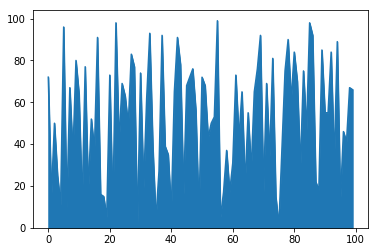

In [5]:
pd1['C1'].plot.area()

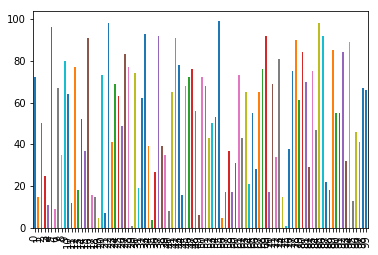

In [6]:
pd1['C1'].plot.bar()

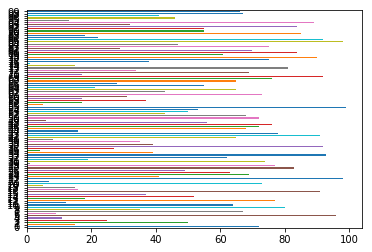

In [8]:
pd1['C1'].plot.barh()

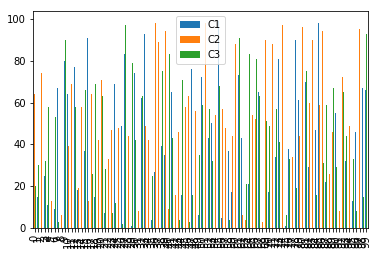

In [9]:
pd1.plot.bar()

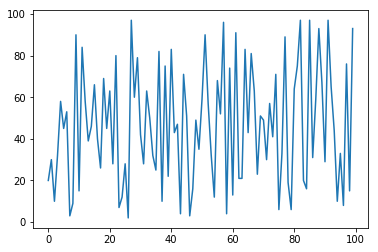

In [10]:
pd1['C3'].plot.line()

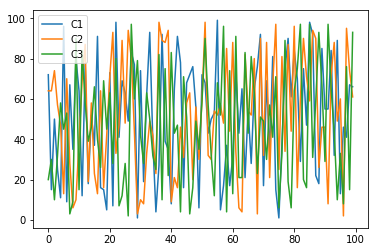

In [11]:
pd1.plot.line()

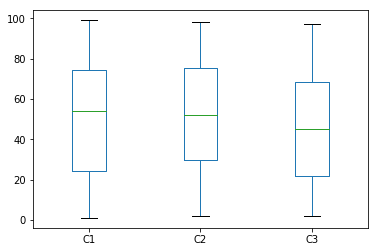

In [12]:
pd1.plot.box()

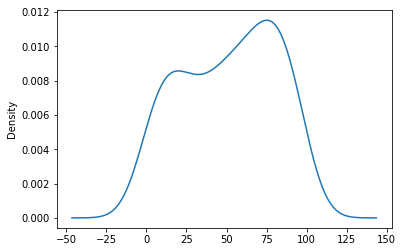

In [4]:
pd1['C2'].plot.kde() #depends on module scipy to display kernel density

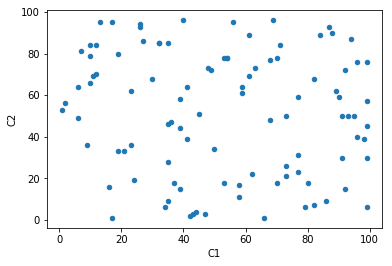

In [6]:
pd1.plot.scatter(x='C1', y='C2')

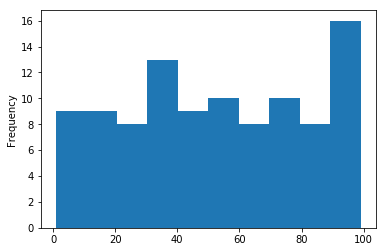

In [20]:
pd1['C1'].plot.hist()

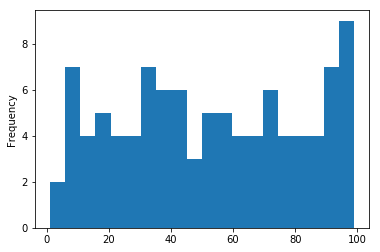

In [19]:
pd1['C1'].plot.hist(bins=20)